In [1]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

import s3dexp.db
import s3dexp.db.utils as dbutils
import s3dexp.db.models as models

from utils import get_by_expnames, pretty

In [2]:
num_workers=8
hostname='cloudlet027'

df_all = pd.read_sql(
    'SELECT expname, avg_wall_ms, 1000/avg_wall_ms as throughput, avg_mbyteps as bandwidth, num_workers FROM EurekaExp \
        WHERE ext=%s AND num_workers=%s AND hostname=%s',
    s3dexp.db.engine,
    params=["video", num_workers, hostname])

print df_all

                          expname  avg_wall_ms  throughput   bandwidth  \
0      baseline_videodiff-every10     2.503602  399.424431   13.857344   
1       baseline_videodiff-every2     2.997746  333.583977   11.573123   
2  smart_videodiff-fps240-every10     4.289701  233.116468   64.465875   
3  smart_videodiff-fps480-every10     2.211260  452.230831  125.059617   
4  smart_videodiff-fps960-every10     1.176801  849.761605  234.992516   
5   smart_videodiff-fps240-every2     4.773347  209.496622  289.670292   
6   smart_videodiff-fps480-every2     2.728593  366.489302  506.743554   
7   smart_videodiff-fps960-every2     1.772777  564.086748  779.960893   

   num_workers  
0            8  
1            8  
2            8  
3            8  
4            8  
5            8  
6            8  
7            8  


                         expname  avg_wall_ms  throughput   bandwidth  \
0  smart_videodiff-fps240-every2     4.773347  209.496622  289.670292   
1  smart_videodiff-fps480-every2     2.728593  366.489302  506.743554   
2  smart_videodiff-fps960-every2     1.772777  564.086748  779.960893   

   num_workers  
0            8  
1            8  
2            8  


<IPython.core.display.Javascript object>


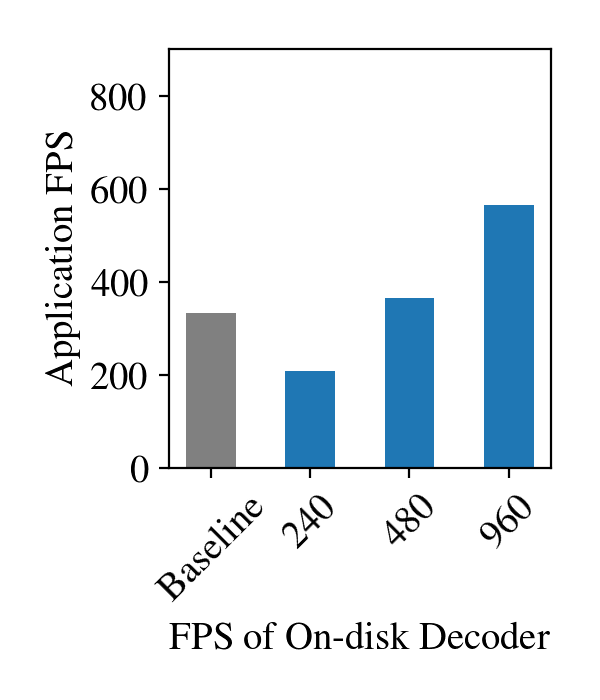

<IPython.core.display.Javascript object>


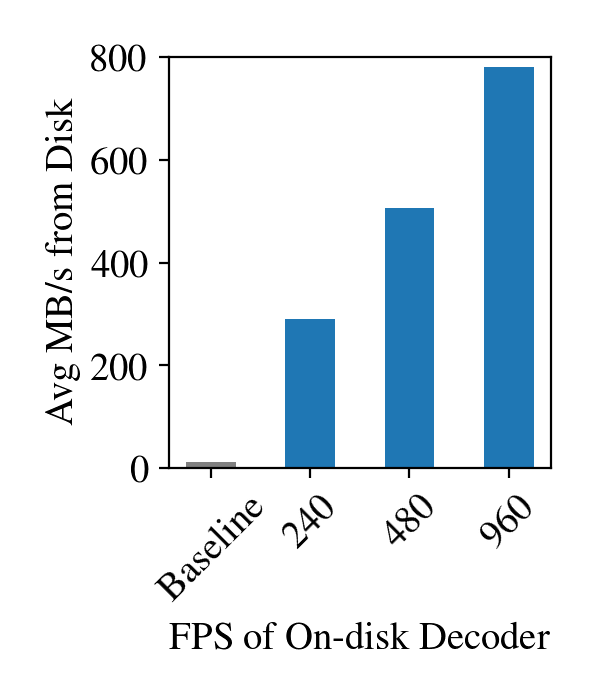

                          expname  avg_wall_ms  throughput   bandwidth  \
0  smart_videodiff-fps240-every10     4.289701  233.116468   64.465875   
1  smart_videodiff-fps480-every10     2.211260  452.230831  125.059617   
2  smart_videodiff-fps960-every10     1.176801  849.761605  234.992516   

   num_workers  
0            8  
1            8  
2            8  


<IPython.core.display.Javascript object>


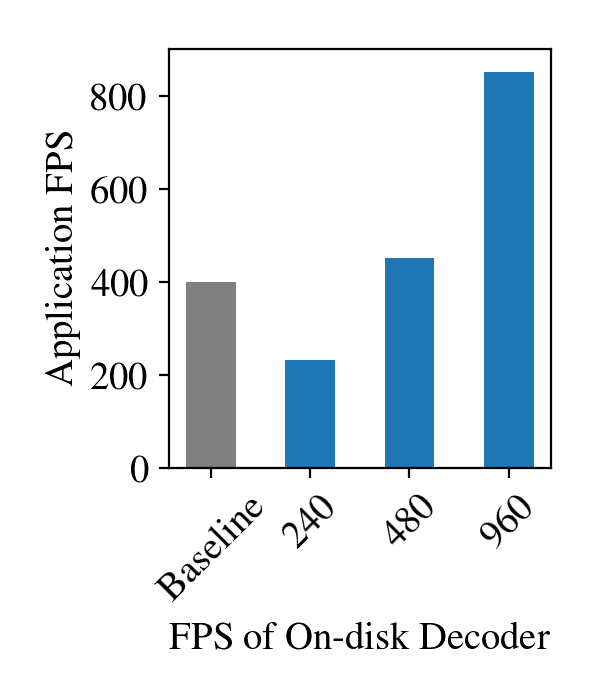

<IPython.core.display.Javascript object>


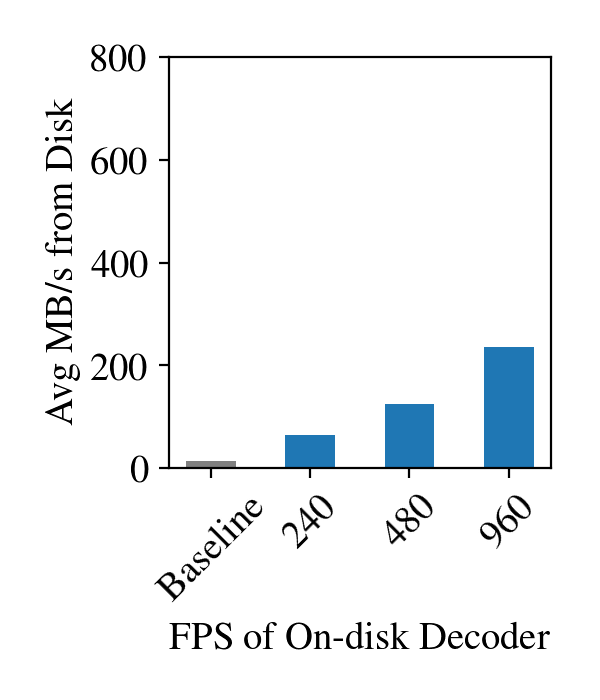

In [5]:
%matplotlib notebook

workload = 'videodiff'

# for each sampling rate
for every in [2, 10]:
        list_fps = [240, 480, 960]
        
        df_baseline = get_by_expnames(df_all, ['baseline_{}-every{}'.format(workload, every), ]) 
        df_ours = get_by_expnames(df_all, ['smart_{}-fps{}-every{}'.format(workload, fps, every) for fps in list_fps ])
        
        print df_ours
        
        ind = np.arange(len(df_ours))
        width = .5

        # Plot app throughput
        fig, ax = plt.subplots(figsize=(3,3.5))
        ax.bar([-1,], df_baseline['throughput'], width, color='gray') # plot baseline at x = -1
        ax.bar(ind, df_ours['throughput'] , width) # Throughput
        ax.set_ylabel("Application FPS")
        ax.set_ylim(None, 900)
        plt.xticks([-1] + list(ind), ['Baseline'] + map(str, list_fps), rotation=45)
        plt.xlabel("FPS of On-disk Decoder")
        
        plt.tight_layout()
        plt.savefig('videodiff-every{}-tput.pdf'.format(every), bbox_inches ='tight')
        
        # Plot bandwidth
        fig, ax = plt.subplots(figsize=(3,3.5))
        ax.bar([-1,], df_baseline['bandwidth'], width, color='gray')
        ax.bar(ind, df_ours['bandwidth'], width) # Bandwidth
        ax.set_ylabel("Avg MB/s from Disk")
        ax.set_ylim(None, 800)
        
        plt.xticks([-1] + list(ind), ['Baseline'] + map(str, list_fps), rotation=45)
        plt.xlabel("FPS of On-disk Decoder")
        
        plt.tight_layout()
        plt.savefig('videodiff-every{}-bandwidth.pdf'.format(every), bbox_inches ='tight')